<div style="display: flex; background-color: #b24c31;" >
<h1 style="margin: auto; padding: 30px; ">PRE-TRAITEMENT ET NETTOYAGE DES DONNEES - LA POULE QUI CHANTE</h1>
</div>

In [1]:
#Librairies importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from scipy import stats

<div style="display: flex; background-color: #b67356;" >
<h1 style="margin: auto; padding: 26px; ">1. Importations des dataframes</h1>
</div>

<div style="display: flex; background-color: #f6e0a5;" >
<h1 style="margin: auto; padding: 18px; ">Sources</h1>
</div>

In [2]:
#International Monetary Fund
'''https://www.imf.org/external/datamapper/PCPIPCH@WEO/OEMDC/ADVEC/WEOWORLD'''
#World bank 
'''https://data360.worldbank.org/en/search?database=WB_HNP&tab=indicator&themeAndTopics=P2_000003'''
#FAO
'''https://www.fao.org/faostat/en/#data'''

'https://www.fao.org/faostat/en/#data'

In [3]:
path ="C:\\Users\\yannf\\Desktop\\Cours\\Formation_data_analyse\\projets\\projet_11\\input\\DAN-P9-data\\"
dispo_alim = "DisponibiliteAlimentaire_2017.csv"
population = "Population_2000_2018.csv"
population_eng = "FAOSTAT_data_en_7-12-2025pop_eng.csv"
economic_per_country  = "FAOSTAT_data_en_6-29-2025economic.csv"
food_price_inflation  ="FAOSTAT_data_en_6-29-2025food_inflation.csv"
food_insecure = "FAOSTAT_data_en_7-5-2025food_secure.csv"
imp_exp = "FAOSTAT_data_en_7-5-2025poultry_impexp.csv"
health_food = "FAOSTAT_data_en_7-5-2025healty_food_price.csv"
clearance_eff = "efficiency_clearance_process.csv"
logistics_perf = "competence_logistic_services.csv"

df_population= pd.read_csv(f"{path}\\{population_eng}", sep=",")
df_economic = pd.read_csv(f"{path}\\{economic_per_country}", sep=",")
df_food_infla = pd.read_csv(f"{path}\\{food_price_inflation}", sep=",")
df_undernourish = pd.read_csv(f"{path}\\{food_insecure}", sep=",")
df_impexp = pd.read_csv(f"{path}\\{imp_exp}", sep=",")
df_healthfood = pd.read_csv(f"{path}\\{health_food}", sep=",")
df_clearance = pd.read_csv(f"{path}\\{clearance_eff}", sep=",")
df_logistics = pd.read_csv(f"{path}\\{logistics_perf}", sep=",")

<div style="display: flex; background-color: #b67356;" >
<h1 style="margin: auto; padding: 26px; ">2. Isolation des variables et nettoyages</h1>
</div>

In [4]:
'''Poultry import/export/production in t - 3 Variables'''

#Isolating each usefull variables and columns to be able to merge all dataframe
item  ="Meat of chickens, fresh or chilled"
df_impexpv1 = df_impexp.loc[(df_impexp["Year"]==2018) & (df_impexp["Item"] == item)]
#pivot table to keep one row for each country and one column for each variables
df_impexpv2 = pd.pivot_table(df_impexpv1, values="Value", columns="Element", index="Area", aggfunc="last")
df_impexpv2["country"] = df_impexpv2.index

#Modifying some country name to fit all Dataframe
country_list = ["China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"]
df_impexpv2 = df_impexpv2.loc[~df_impexpv2["country"].isin(country_list)]

#Checking the difference between all countries referenced and the variables where values are missing
print("Il y a ", len(df_impexpv2), "pays.")
print("Il manque ", len(df_impexpv2.loc[df_impexpv2['Export quantity'].isna()]), "pays pour la quantité d'export.")
print("Il manque", len(df_impexpv2.loc[df_impexpv2['Import quantity'].isna()]), "pays pour la quantité d'import.")
print("Il manque", len(df_impexpv2.loc[df_impexpv2["Production"].isna()]), "pays pour la quantité de production.")
#More than 100 countries for all the variables

Il y a  177 pays.
Il manque  53 pays pour la quantité d'export.
Il manque 5 pays pour la quantité d'import.
Il manque 2 pays pour la quantité de production.


In [5]:
'''GDP value in US$ per capita and GDP % variation - 2 Variables'''

#Isolating each usefull variables and columns to be able to merge all dataframe
element  = ["Annual growth US$ per capita","Value US$ per capita"]
df_economicv1 = df_economic.loc[(df_economic["Year"]==2018) & (df_economic["Element"].isin(element))]
df_economicv2 = pd.pivot_table(df_economicv1, values="Value", columns="Element", index="Area", aggfunc="last")
df_economicv2["country"] = df_economicv2.index

#Modifying some country name to fit all Dataframe
country_list = ["China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China"]
df_economicv2 = df_economicv2.loc[~df_economicv2["country"].isin(country_list)]
df_economicv2.loc[df_economicv2["country"] == 'China, mainland', "country"] = "China"

#Checking the difference between all countries referenced and the variables where values are missing
print("Il y a ", len(df_economicv2), "pays.")
print("Il manque", len(df_economicv2.loc[df_economicv2['Annual growth US$ per capita'].isna()]), "pays pour la croissance du PIB.")
print("Il manque", len(df_economicv2.loc[df_economicv2['Value US$ per capita'].isna()]), "pays pour le PIB par habitant.")
#More than 100 countries for all the variables

Il y a  208 pays.
Il manque 0 pays pour la croissance du PIB.
Il manque 0 pays pour le PIB par habitant.


In [6]:
'''Consumer price indice - 1 Variable'''

#Isolating the usefull variable to be able to merge all dataframe
item = "Consumer Prices, Food Indices (2015 = 100)"
df_food_inflav1 = df_food_infla.loc[(df_food_infla["Year"]==2018) & (df_food_infla["Item"] == item) ]
df_food_inflav2 = df_food_inflav1.groupby(["Area"]).agg(infla_var = ("Value" , "mean"))
#Transform the inflation value to have more variance and potential positiv and negativ values
df_food_inflav2["infla_var"] = df_food_inflav2["infla_var"] -100
df_food_inflav2["country"] = df_food_inflav2.index

#Modifying some country name to fit all Dataframe
df_food_inflav2.loc[df_food_inflav2["country"]== 'China, mainland', "country"] = "China"

#Checking the difference between all countries referenced and the variables where values are missing
print("Il y a ", len(df_food_inflav2), "pays.")
print("Il manque", len(df_food_inflav2.loc[df_food_inflav2['infla_var'].isna()]), "pays pour l'indice de consommation.")
#More than 100 countries for all the variables

Il y a  200 pays.
Il manque 0 pays pour l'indice de consommation.


In [7]:
'''Undernourishment, export import food percent - 2 Variables'''

#Isolating each usefull variables and columns to be able to merge all dataframe
df_undernourishv1 = df_undernourish.loc[df_undernourish["Year"]=="2017-2019"]
df_undernourishv2 = pd.pivot_table(df_undernourishv1, values="Value", columns="Item", index="Area", aggfunc="last")
df_undernourishv2["country"] = df_undernourishv2.index

#Modifying some country name to fit all Dataframe
country_list = ["China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"]
df_undernourishv2 = df_undernourishv2.loc[~df_undernourishv2["country"].isin(country_list)]
df_undernourishv2.loc[df_undernourishv2["country"]== 'China, mainland', "country"] = "China"

#Replace the <2.5 value to have only float type
df_undernourishv2.loc[df_undernourishv2['Prevalence of undernourishment (percent) (3-year average)'] =="<2.5",
                                        'Prevalence of undernourishment (percent) (3-year average)'] = 2

#Checking the difference between all countries referenced and the variables where values are missing
print("Il y a ", len(df_undernourishv2), "pays.")
print("Il manque", len(df_undernourishv2.loc[df_undernourishv2['Prevalence of undernourishment (percent) (3-year average)'].isna()]), "pays pour la sous nutrition.")
print("Il manque", len(df_undernourishv2.loc[df_undernourishv2['Value of food imports in total merchandise exports (percent) (3-year average)'].isna()]), "pays pour le pourcentage d'import par rapport a l'export en nourriture.")
#More than 100 countries for all the variables

Il y a  191 pays.
Il manque 22 pays pour la sous nutrition.
Il manque 0 pays pour le pourcentage d'import par rapport a l'export en nourriture.


In [8]:
'''Population evolution per country - 2 Variables (to transform into a % variation from 2015 to 2018)'''

#Isolating each usefull variables and columns to be able to merge all dataframe
df_populationv1 = df_population.loc[(df_population["Year"]>2014) & (df_population["Year"]< 2019)]
df_populationv2 = pd.pivot_table(df_populationv1, values="Value", columns="Year", index="Area", aggfunc="last")
df_populationv2.columns = [f"pop_{i}" for i in df_populationv2.columns]

#Calculate the percent of variation of the population for the last 3 years
df_populationv2["percent_var_pop"] =( (df_populationv2["pop_2018"]/ df_populationv2["pop_2015"]) -1)*100
df_populationv2 = df_populationv2.filter(items=["pop_2018", "percent_var_pop"])
df_populationv2["pop_2018"] = df_populationv2["pop_2018"]*1000 #Modify the unity
df_populationv2["country"] = df_populationv2.index

#Modifying some country name to fit all Dataframe
country_list = ["China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China"]
df_populationv2 = df_populationv2.loc[~df_populationv2["country"].isin(country_list)]
df_populationv2.loc[df_populationv2["country"] == 'China, mainland', "country"] = "China"

#Checking the difference between all countries referenced and the variables where values are missing
print("Il y a ", len(df_populationv2), "pays.")
print("Il manque", len(df_populationv2.loc[df_populationv2["pop_2018"].isna()]), "pays pour la population.")
#More than 100 countries for all the variables

Il y a  230 pays.
Il manque 0 pays pour la population.


In [9]:
'''Number of people unable to afford healthy diet - 1 Variable (148 countries with values only)'''

#Isolating the usefull variable to be able to merge all dataframe
df_healthfood.loc[~df_healthfood["Value"].isna()].head()
df_healthfoodv1 = df_healthfood.loc[df_healthfood["Year"]==2018]
df_healthfoodv2 = pd.pivot_table(df_healthfoodv1, values="Value", columns="Item", index="Area", aggfunc="last")

#Modifie the smaller value to be able to transform the column into float
df_healthfoodv2.loc[df_healthfoodv2['Number of people unable to afford a healthy diet (NUA), million'] =="<0.1", 'Number of people unable to afford a healthy diet (NUA), million'] = 0.05
df_healthfoodv2['Number of people unable to afford a healthy diet (NUA), million'] = df_healthfoodv2['Number of people unable to afford a healthy diet (NUA), million'].astype("float64")
df_healthfoodv2['Number of people unable to afford a healthy diet (NUA), million']  =df_healthfoodv2['Number of people unable to afford a healthy diet (NUA), million']*1000000
df_healthfoodv2["country"] = df_healthfoodv2.index

#Modifying some country name to fit all Dataframe
df_healthfoodv2.loc[df_healthfoodv2["country"] == 'China, mainland', "country"] = "China"

#Checking the difference between all countries referenced and the variables where values are missing
print("Il y a ", len(df_healthfoodv2), "pays pour lesquels nous avons une valeur.")
#More than 100 countries for all the variables

Il y a  146 pays pour lesquels nous avons une valeur.


In [10]:
'''Clearance process efficency - 1 Variable (rated from 1 to 5, 1 is highest)'''

#Isolating the usefull variable to be able to merge all dataframe
df_clearancev1 = df_clearance.loc[(df_clearance["TIME_PERIOD"]==2018) & (~df_clearance["OBS_VALUE"].isna()), ["REF_AREA_LABEL","OBS_VALUE"]]
df_clearancev1.rename(columns={"REF_AREA_LABEL":"country"}, inplace=True)

#Modifying some country name to fit all Dataframe
df_clearancev1.loc[df_clearancev1["country"]=='United States', "country"] = 'United States of America'
df_clearancev1.loc[df_clearancev1["country"]=='United Kingdom', "country"] = 'United Kingdom of Great Britain and Northern Ireland'

print("Il y a", len(df_clearancev1), "pays pour lesquels nous avons une valeur.")
#More than 100 countries for all the variables

Il y a 160 pays pour lesquels nous avons une valeur.


In [11]:
'''Logistic quality - 1 Variable  (rated from 1 to 5, 1 is highest)'''

#Isolating the usefull variable to be able to merge all dataframe
df_logisticsv1 = df_logistics.loc[(df_logistics["TIME_PERIOD"]==2018) & (~df_logistics["OBS_VALUE"].isna()), ["REF_AREA_LABEL","OBS_VALUE"]]
df_logisticsv1.rename(columns={"REF_AREA_LABEL":"country"}, inplace=True)

#Modifying some country name to fit all Dataframe
df_logisticsv1.loc[df_logisticsv1["country"]=='United States', "country"] = 'United States of America'
df_logisticsv1.loc[df_logisticsv1["country"]=='United Kingdom', "country"] = 'United Kingdom of Great Britain and Northern Ireland'

print("Il y a", len(df_logisticsv1), "pays pour lesquels nous avons une valeur.")
#More than 100 countries for all the variables

Il y a 160 pays pour lesquels nous avons une valeur.


<div style="display: flex; background-color: #b67356;" >
<h1 style="margin: auto; padding: 26px; ">3. Assemblage des dataframes</h1>
</div>

In [12]:
#Merging all the dataframe
main_df = pd.merge(df_impexpv2, df_economicv2, on="country", how="outer")
main_df = pd.merge(main_df, df_food_inflav2, on="country", how="outer")
main_df = pd.merge(main_df, df_undernourishv2, on="country", how="outer")
main_df = pd.merge(main_df, df_populationv2, on="country", how="outer")
main_df = pd.merge(main_df, df_healthfoodv2, on="country", how="outer")
main_df = pd.merge(main_df, df_clearancev1, on="country", how="outer")
main_df = pd.merge(main_df, df_logisticsv1, on="country", how="outer")

In [13]:
#Calculate the total population before removing some country that have missing values
total_pop = main_df["pop_2018"].sum()
#Setting a copy of the dataframe before transforming some values
main_dfv2 = main_df.copy()

In [14]:
#We try to transform the population values into logarithm to have a normalize distribution
main_df["pop_2018"] = np.log(main_df["pop_2018"])
main_df["Production"] = np.log(main_df["Production"])
main_df["Production"] = np.log(main_df["Production"])
# main_df["Value US$ per capita"] = np.log(main_df["Value US$ per capita"])
main_df["Import quantity"] = np.log(main_df["Import quantity"])
main_df['Number of people unable to afford a healthy diet (NUA), million'] = np.log(main_df['Number of people unable to afford a healthy diet (NUA), million'])

In [15]:
#After the merge some column get transformed into the wrong type that I have to modify
col_list = ['Prevalence of undernourishment (percent) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)']
main_df[col_list] = main_df[col_list].astype("float64")

In [16]:
#modified the flat value into a percentage to avoid too high value miss-orientation (india, USA, China)
main_df['Number of people unable to afford a healthy diet (NUA), million'] = main_df['Number of people unable to afford a healthy diet (NUA), million'] / main_df["pop_2018"]

<div style="display: flex; background-color: #f6e0a5;" >
<h1 style="margin: auto; padding: 26px; ">3.1 Vérification de la distribution</h1>
</div>

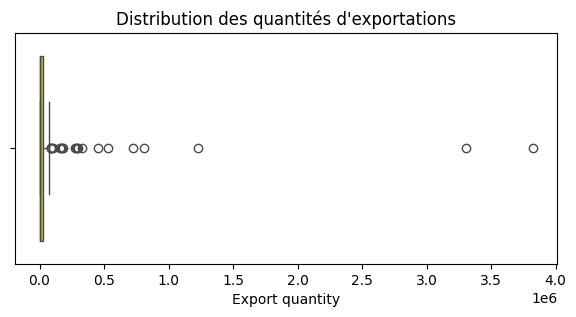

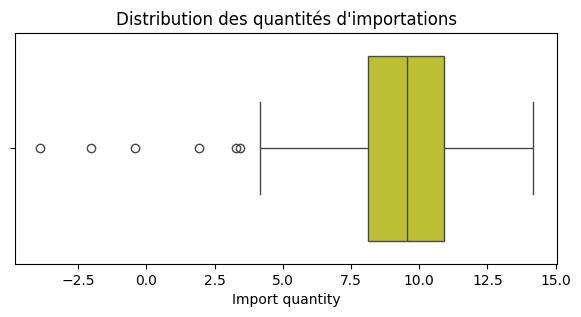

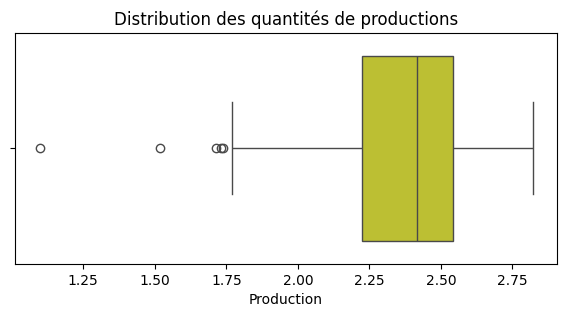

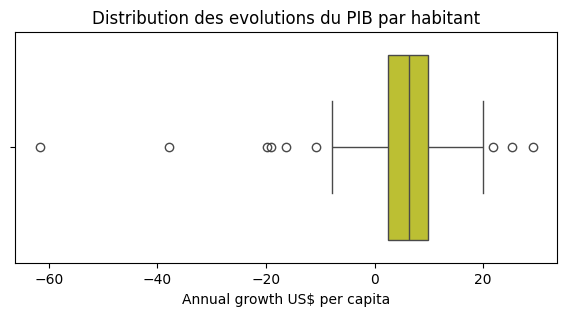

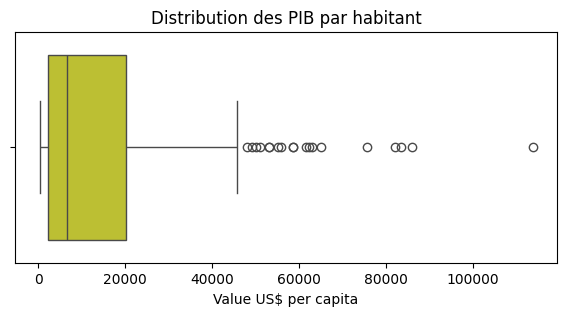

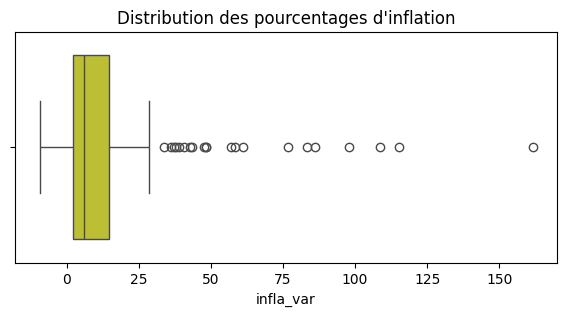

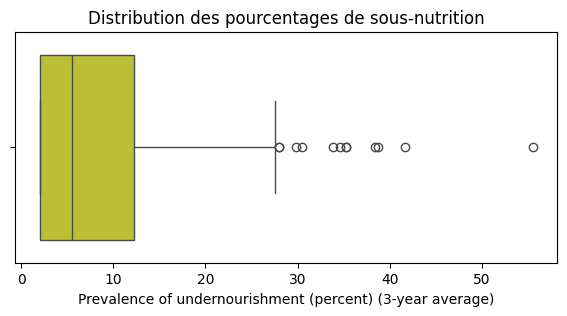

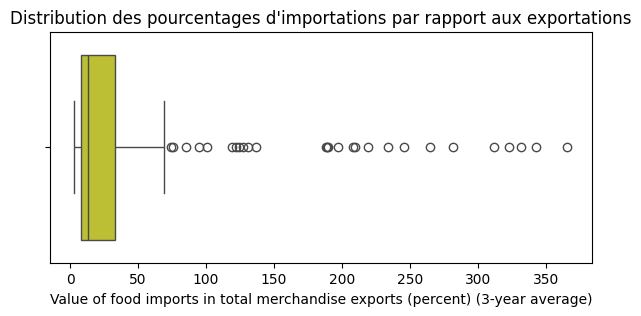

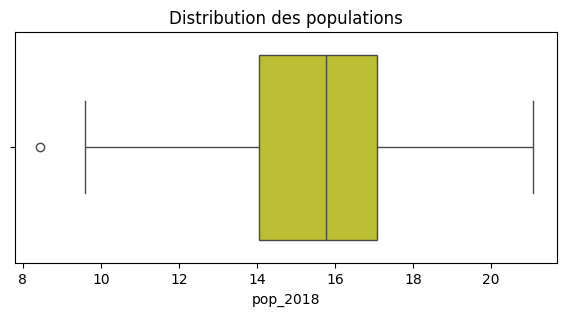

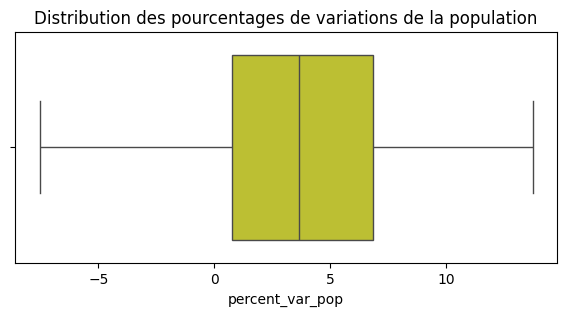

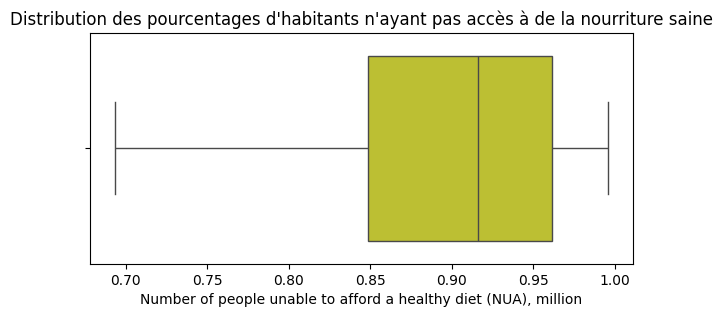

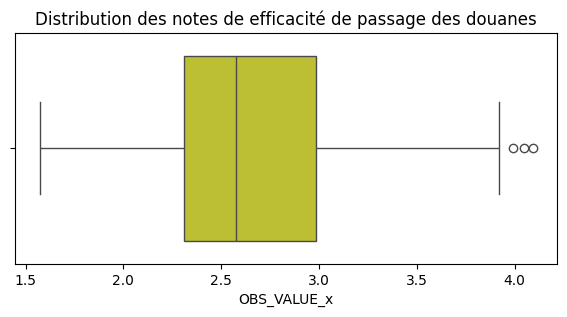

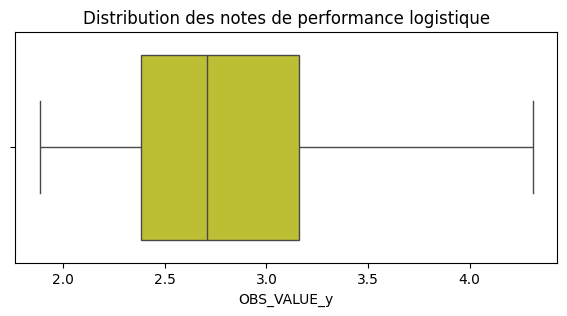

In [17]:
#need to change the order of the title

list_of_title = ["Distribution des quantités d'exportations", "Distribution des quantités d'importations",
                 "Distribution des quantités de productions", "Distribution des evolutions du PIB par habitant", "Distribution des PIB par habitant",
                 "Distribution des pourcentages d'inflation", "Distribution des pourcentages de sous-nutrition", "Distribution des pourcentages d'importations par rapport aux exportations",
                 "Distribution des populations", "Distribution des pourcentages de variations de la population",  "Distribution des pourcentages d'habitants n'ayant pas accès à de la nourriture saine",
                 "Distribution des notes de efficacité de passage des douanes", "Distribution des notes de performance logistique"]

main_df = main_df.loc[main_df["infla_var"] <500]
variables = main_df.columns.tolist()
variables.remove("country")
for i, col in enumerate(variables) :
    fig = plt.figure(figsize =(7, 3))
    sns.boxplot(main_df[col], orient="h", color="#d3d61c")
    plt.title(list_of_title[i])

In [18]:
#I find out that I got only 84 countries with a value for each indicator, so I decide to remove the indicator with the
#lowest number of country
main_df.drop('Export quantity', axis=1, inplace=True)
main_df.drop('Import quantity', axis=1, inplace=True)
#remove the columns from the df and from the variables list and set a copy of the df before the columns name modification
variables.remove("Export quantity")
variables.remove("Import quantity")

In [19]:
#I have 105 countries now, what is filling the first criteria
main_df.dropna(how="any", inplace=True)
print(len(main_df))
df_normal_test = main_df.copy()

109


In [20]:
#We are now testing the normal distribution of our values
for x in variables :
    shapiro_test = stats.shapiro(df_normal_test[x])
    I = 'suit' if shapiro_test.pvalue >= 0.05 else 'ne suit pas'
    print(f"La variables {x} a une p-value de {shapiro_test.pvalue}, elle {I} une loi normale.")

La variables Production a une p-value de 8.621359793679708e-05, elle ne suit pas une loi normale.
La variables Annual growth US$ per capita a une p-value de 1.8675919611889035e-14, elle ne suit pas une loi normale.
La variables Value US$ per capita a une p-value de 8.818092756740572e-13, elle ne suit pas une loi normale.
La variables infla_var a une p-value de 5.615672450004662e-16, elle ne suit pas une loi normale.
La variables Prevalence of undernourishment (percent) (3-year average) a une p-value de 6.62836583331873e-14, elle ne suit pas une loi normale.
La variables Value of food imports in total merchandise exports (percent) (3-year average) a une p-value de 8.266274193589829e-18, elle ne suit pas une loi normale.
La variables pop_2018 a une p-value de 0.8516928409276898, elle suit une loi normale.
La variables percent_var_pop a une p-value de 0.3744170821908044, elle suit une loi normale.
La variables Number of people unable to afford a healthy diet (NUA), million a une p-value d

In [21]:
#Filling the 2nd criteria
calculated_pop = round(int(main_dfv2.loc[main_dfv2["country"].isin(main_df["country"]),"pop_2018"].sum()) /1000000000 , 2)
print(f"Il y a {calculated_pop} milliard de personnes dans les pays encore présents dans le dataframe.")
print(f"La population mondiale à la date de mon analyse est de {round(total_pop/10**9 ,2)} milliard, j'ai donc au moins {round((calculated_pop /total_pop*10**11),2)}% du total.")

Il y a 6.53 milliard de personnes dans les pays encore présents dans le dataframe.
La population mondiale à la date de mon analyse est de 7.7 milliard, j'ai donc au moins 84.85% du total.


In [22]:
#Rename all the longs columns to ease the analysis work
main_df.rename(columns={'Annual growth US$ per capita_x' : 'GDP$ Growth', 'Value US$ per capita_x' :'GDP$',
                        'Prevalence of undernourishment (percent) (3-year average)': 'Undernourish%',
                        'Value of food imports in total merchandise exports (percent) (3-year average)':'Import_export%',
                        'Number of people unable to afford a healthy diet (NUA), million':'Healthy_diet',
                       'OBS_VALUE_x': 'clearance', 'OBS_VALUE_y':'logistic_quality',
                       "pop_2018":'pop_2018'}, inplace=True)
main_df.columns
main_df = main_df.set_index("country", drop=True)

In [23]:
#We export the prepared data
main_df.to_csv(f"{path}main_df.csv", index=True)